In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.2/661.2 kB 3.2 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import numpy as np
import cv2
from PIL import Image
import os, json, cv2, random
from google.colab.patches import cv2_imshow


**Перед тем как начать выполнять задание, определитесь где вы будете обучать модель: на GPU или CPU.**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
from ultralytics import YOLO
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/166.8 GB disk)


In [ ]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 104MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets

In [10]:
print(HOME)

/content


In [14]:
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="arcadiumdataset_v8.yaml", epochs=100, batch=18, workers=2)

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=arcadiumdataset_v8.yaml, epochs=100, time=None, patience=50, batch=18, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, for

train: Scanning /content/datasets/arcadiumdataset/labels.cache... 346 images, 0 backgrounds, 0 corrupt: 100%|██████████| 346/346 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/arcadiumdataset/labels.cache... 346 images, 0 backgrounds, 0 corrupt: 100%|██████████| 346/346 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.21G       1.84      4.511      1.173         10        640: 100%|██████████| 20/20 [00:12<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        346        960    0.00271      0.096     0.0621      0.044



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.81G      1.383      2.111      0.981         20        640: 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        346        960    0.00762      0.596      0.405      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.78G      1.309      1.611     0.9784         14        640: 100%|██████████| 20/20 [00:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960     0.0112       0.86      0.529      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.79G      1.318      1.381     0.9873         14        640: 100%|██████████| 20/20 [00:09<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        346        960       0.97      0.299      0.666      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.81G      1.286      1.249     0.9765         18        640: 100%|██████████| 20/20 [00:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]

                   all        346        960      0.919      0.611      0.744      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.81G      1.276      1.229     0.9733         18        640: 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


                   all        346        960      0.882      0.683      0.836      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.78G      1.319       1.16     0.9826         34        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


                   all        346        960      0.877      0.667      0.773      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.79G      1.222      1.096     0.9615         10        640: 100%|██████████| 20/20 [00:06<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]


                   all        346        960      0.653      0.858      0.846      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.78G      1.241      1.011     0.9717         27        640: 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]

                   all        346        960      0.732      0.814      0.908      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.8G      1.218      1.001     0.9683         18        640: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]

                   all        346        960      0.875      0.801      0.934      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.81G      1.234     0.9373     0.9623         18        640: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        346        960      0.854       0.81      0.941      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.81G      1.227      0.915     0.9558         17        640: 100%|██████████| 20/20 [00:07<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]

                   all        346        960      0.936      0.885      0.963      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.8G      1.234     0.8865     0.9631         26        640: 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

                   all        346        960      0.937      0.874      0.956      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.8G      1.245     0.8902      0.956         21        640: 100%|██████████| 20/20 [00:07<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]

                   all        346        960       0.89      0.933      0.971       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.77G      1.226     0.8525     0.9539         19        640: 100%|██████████| 20/20 [00:08<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.949      0.961      0.981      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.78G      1.194     0.8559      0.948         24        640: 100%|██████████| 20/20 [00:09<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]


                   all        346        960      0.896      0.946      0.984      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.78G      1.196     0.8444     0.9609         13        640: 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]

                   all        346        960      0.861      0.995      0.986      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.8G       1.19     0.8337     0.9447         23        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]

                   all        346        960      0.973      0.867      0.987      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.81G      1.201     0.7963      0.965         21        640: 100%|██████████| 20/20 [00:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        346        960      0.943       0.98      0.991      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.81G      1.191      0.791     0.9453         15        640: 100%|██████████| 20/20 [00:07<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.974      0.967      0.989      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.81G      1.178     0.7417     0.9368         28        640: 100%|██████████| 20/20 [00:08<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]

                   all        346        960      0.948      0.973      0.989      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.8G      1.188      0.766     0.9606         23        640: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        346        960      0.949       0.96      0.986      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.81G       1.19     0.7293     0.9338         22        640: 100%|██████████| 20/20 [00:09<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        346        960      0.914      0.949      0.984      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.78G      1.172      0.722     0.9351         18        640: 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        346        960      0.951      0.975      0.991      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.8G      1.166     0.7138     0.9397         21        640: 100%|██████████| 20/20 [00:06<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]

                   all        346        960      0.956      0.969       0.99       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.8G      1.155     0.7046     0.9352         19        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

                   all        346        960       0.96      0.982      0.992      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.81G      1.192     0.7135     0.9563         17        640: 100%|██████████| 20/20 [00:07<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]

                   all        346        960      0.977      0.975      0.992      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.81G      1.178     0.7042      0.945         19        640: 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]

                   all        346        960      0.902      0.967       0.99       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.81G       1.18      0.725     0.9456         30        640: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]

                   all        346        960      0.932      0.948       0.99      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.78G      1.163     0.6734     0.9421         20        640: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]

                   all        346        960      0.968      0.985       0.99      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.78G       1.16     0.6826     0.9426         17        640: 100%|██████████| 20/20 [00:06<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]

                   all        346        960      0.965      0.978      0.991      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.78G      1.164     0.6847     0.9412         19        640: 100%|██████████| 20/20 [00:06<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]

                   all        346        960      0.966      0.961      0.993      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.78G      1.143     0.6647     0.9298         20        640: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        346        960      0.973      0.979      0.993      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.8G      1.177     0.6676     0.9563         20        640: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.962      0.991      0.992      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.81G      1.175     0.6573     0.9391         16        640: 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        346        960      0.966      0.993      0.993      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.65G      1.164     0.6534     0.9535         21        640: 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        346        960      0.977      0.982      0.992      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.78G      1.168     0.6441     0.9308         22        640: 100%|██████████| 20/20 [00:06<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.71it/s]

                   all        346        960      0.962      0.992      0.992      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.8G      1.148     0.6441     0.9318         15        640: 100%|██████████| 20/20 [00:07<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]

                   all        346        960      0.967      0.988      0.992      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.78G      1.164     0.6403     0.9547         14        640: 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]

                   all        346        960      0.958      0.988      0.991      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.8G      1.145     0.6324     0.9291         20        640: 100%|██████████| 20/20 [00:09<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]

                   all        346        960      0.973      0.987      0.992      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.81G      1.157     0.6163     0.9331         26        640: 100%|██████████| 20/20 [00:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]

                   all        346        960      0.973      0.992      0.993      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.81G      1.207     0.6345     0.9506         15        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]

                   all        346        960      0.978       0.99      0.993      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.78G      1.175     0.6196     0.9372         22        640: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        346        960      0.975      0.979      0.993      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.78G      1.152     0.6059     0.9304         24        640: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.963      0.977      0.991      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.78G      1.103     0.5809     0.9201         27        640: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]

                   all        346        960      0.971      0.985      0.993      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.8G      1.124     0.5933     0.9159         21        640: 100%|██████████| 20/20 [00:08<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]

                   all        346        960      0.984      0.978      0.993       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.8G      1.129     0.5938     0.9212         29        640: 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]

                   all        346        960       0.98      0.987      0.993      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.78G      1.088     0.5789     0.9187         17        640: 100%|██████████| 20/20 [00:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]

                   all        346        960      0.974      0.976      0.994      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.8G      1.083     0.5621     0.9129         18        640: 100%|██████████| 20/20 [00:08<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]

                   all        346        960      0.969      0.991      0.993      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.77G      1.105      0.568     0.9165         27        640: 100%|██████████| 20/20 [00:06<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        346        960       0.97      0.989      0.993       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.77G      1.112     0.5922     0.9157         43        640: 100%|██████████| 20/20 [00:08<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]

                   all        346        960      0.979      0.983      0.994      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.8G       1.08     0.5773     0.9305         13        640: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]

                   all        346        960      0.978      0.983      0.993      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.78G      1.084     0.5623     0.9281         18        640: 100%|██████████| 20/20 [00:10<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]

                   all        346        960      0.981      0.981      0.993      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.78G      1.109     0.5738     0.9142         30        640: 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

                   all        346        960      0.971      0.987      0.994      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.81G      1.095     0.5689      0.931         19        640: 100%|██████████| 20/20 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        346        960      0.966      0.988      0.993      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.81G      1.099     0.5617     0.9257         23        640: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        346        960       0.98      0.983      0.993      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.8G      1.107     0.5755     0.9268         23        640: 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]

                   all        346        960      0.978      0.991      0.994      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.8G      1.079     0.5498     0.9172         28        640: 100%|██████████| 20/20 [00:08<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        346        960      0.946      0.983      0.994      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.8G      1.085     0.5612     0.9219         15        640: 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]

                   all        346        960      0.981      0.983      0.994      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.8G       1.07     0.5572     0.9144         13        640: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        346        960      0.979      0.986      0.994      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.78G      1.096      0.558     0.9116         20        640: 100%|██████████| 20/20 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]

                   all        346        960      0.981      0.991      0.994      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.81G      1.086     0.5435     0.9043         33        640: 100%|██████████| 20/20 [00:06<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        346        960      0.978      0.991      0.994      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.8G      1.045     0.5311     0.9032         18        640: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]

                   all        346        960      0.983      0.992      0.994      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.78G       1.06     0.5281     0.9122         25        640: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        346        960      0.981      0.987      0.994      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.78G      1.072     0.5329     0.9077         28        640: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.983      0.992      0.994      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.78G      1.073     0.5332      0.911         24        640: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]

                   all        346        960      0.978      0.992      0.994      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.78G      1.069     0.5396     0.9128         26        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        346        960      0.976      0.994      0.994      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.8G      1.077     0.5242     0.9172         20        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]

                   all        346        960      0.979      0.993      0.994      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.78G      1.034     0.5266     0.9154         20        640: 100%|██████████| 20/20 [00:08<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]

                   all        346        960      0.976      0.991      0.995      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.8G      1.068     0.5217     0.9135         21        640: 100%|██████████| 20/20 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]

                   all        346        960      0.978      0.992      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.79G      1.054     0.5256     0.9062         15        640: 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        346        960      0.982      0.991      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.78G      1.027     0.5163     0.9106         29        640: 100%|██████████| 20/20 [00:06<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        346        960      0.981      0.995      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.8G      1.036     0.5143     0.9024         32        640: 100%|██████████| 20/20 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]

                   all        346        960       0.98      0.997      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.78G      1.036     0.5075      0.911         31        640: 100%|██████████| 20/20 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.978      0.996      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.78G      1.028     0.5163     0.9119         14        640: 100%|██████████| 20/20 [00:08<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960      0.977      0.994      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.81G      1.014      0.504     0.8999         21        640: 100%|██████████| 20/20 [00:09<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        346        960      0.976      0.995      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       2.8G      1.049     0.5189     0.9121         18        640: 100%|██████████| 20/20 [00:07<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

                   all        346        960      0.982      0.992      0.994      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.8G      1.012        0.5        0.9         29        640: 100%|██████████| 20/20 [00:06<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]

                   all        346        960      0.981       0.99      0.994       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       2.8G      1.008     0.4925      0.896         19        640: 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

                   all        346        960      0.978      0.993      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.77G      1.019     0.4942      0.906         28        640: 100%|██████████| 20/20 [00:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]

                   all        346        960      0.979      0.999      0.995      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.78G       1.02     0.5027     0.9052         27        640: 100%|██████████| 20/20 [00:08<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]

                   all        346        960      0.981      0.996      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.78G      1.019     0.4873      0.898         27        640: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.24it/s]

                   all        346        960       0.98      0.995      0.995      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.8G      1.025     0.5052     0.8919         27        640: 100%|██████████| 20/20 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        346        960      0.977      0.996      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.78G      0.999     0.4931     0.9087         20        640: 100%|██████████| 20/20 [00:06<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        346        960      0.977      0.993      0.994      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.78G      1.024     0.5017     0.9105         15        640: 100%|██████████| 20/20 [00:06<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        346        960      0.982      0.993      0.994      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.77G       1.01     0.5025     0.8968         24        640: 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.50it/s]

                   all        346        960      0.981      0.995      0.994      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.78G     0.9785     0.4803     0.8937         21        640: 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        346        960       0.98      0.995      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.78G       1.01     0.4873     0.9035         18        640: 100%|██████████| 20/20 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]

                   all        346        960      0.983      0.995      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.8G      1.007     0.4803      0.907         13        640: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]

                   all        346        960      0.984      0.996      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.78G     0.9626     0.4702     0.8917          8        640: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.19it/s]

                   all        346        960      0.983      0.992      0.995      0.793


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.95G      1.015     0.5434     0.9133          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]

                   all        346        960      0.979       0.99      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.77G     0.9966     0.5428     0.9053          7        640: 100%|██████████| 20/20 [00:06<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        346        960      0.975      0.992      0.995      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.77G     0.9956     0.5195     0.9082         10        640: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]

                   all        346        960      0.976      0.995      0.994      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.77G      0.981     0.5082     0.9017         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]

                   all        346        960       0.98      0.992      0.994      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.78G     0.9661     0.5163     0.9002         10        640: 100%|██████████| 20/20 [00:08<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.50it/s]

                   all        346        960      0.982      0.992      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.78G     0.9482     0.4955      0.894         10        640: 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.20it/s]

                   all        346        960      0.983      0.994      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.77G     0.9458     0.4951     0.9006          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]

                   all        346        960      0.978      0.994      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.77G       0.95     0.4922     0.8905         12        640: 100%|██████████| 20/20 [00:06<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]

                   all        346        960      0.981      0.994      0.994      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.77G     0.9391     0.4933     0.8907         12        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]

                   all        346        960      0.983      0.993      0.994      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.77G      0.946      0.503      0.888         10        640: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        346        960      0.983      0.994      0.994      0.802



100 epochs completed in 0.390 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


                   all        346        960      0.981      0.994      0.994      0.806
                choose        346         28      0.992          1      0.995      0.823
             choose_ok        346         12      0.972          1      0.995      0.919
          enemy_common        346        183      0.989      0.964       0.99      0.721
           enemy_green        346         48      0.982          1      0.995       0.77
            enemy_blue        346         43          1      0.982      0.995      0.785
         enemy_rainbow        346         16      0.994          1      0.995      0.748
                 pause        346        316      0.999      0.997      0.995       0.78
                player        346        311      0.996          1      0.995      0.747
                 start        346          3      0.901          1      0.995      0.963
Speed: 0.4ms preprocess, 2.6ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78305a615150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

# Results

In [18]:
saved_model = YOLO("runs/detect/train2/weights/best.pt")

In [21]:
img = os.path.join('datasets', 'arcadiumdataset', 'images', 'e686f190-9fda-11ee-98e0-acde48001122.jpg')
results = model(img)


image 1/1 /content/datasets/arcadiumdataset/images/e686f190-9fda-11ee-98e0-acde48001122.jpg: 640x288 2 enemy_commons, 1 enemy_green, 1 pause, 1 player, 31.7ms
Speed: 3.5ms preprocess, 31.7ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 288)


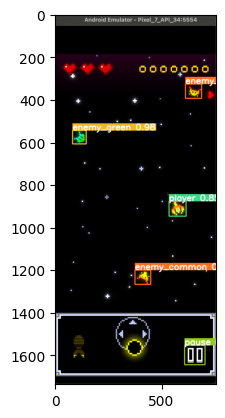

In [22]:
r=results[0].plot()[..., ::-1]
plt.imshow(r)
plt.show()

In [29]:
img = os.path.join('datasets', 'arcadiumdataset', 'images', '8879386a-9fda-11ee-8a32-acde48001122.jpg')
results = model(img)


image 1/1 /content/datasets/arcadiumdataset/images/8879386a-9fda-11ee-8a32-acde48001122.jpg: 640x288 1 enemy_common, 1 enemy_rainbow, 1 pause, 1 player, 14.8ms
Speed: 4.0ms preprocess, 14.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 288)


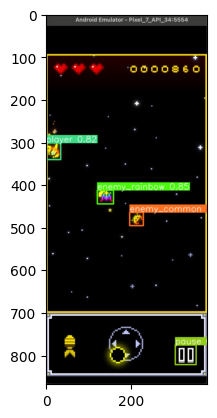

In [26]:
r=results[0].plot()[..., ::-1]
plt.imshow(r)
plt.show()

In [27]:
model.export(format='openvino')

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 13, 8400) (5.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 53.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 12.3s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 13.5s, saved as 'runs/detect/train2/weights/best.onnx' (11.7 MB)
requirements: Ultralytics requirement ['openvino-dev>=2023.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 52.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━

'runs/detect/train2/weights/best_openvino_model'

# Model400

In [28]:
model400 = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model400.train(data="arcadiumdataset_v8.yaml", epochs=400, batch=18, workers=2)

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=arcadiumdataset_v8.yaml, epochs=400, time=None, patience=50, batch=18, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, for

train: Scanning /content/datasets/arcadiumdataset/labels.cache... 346 images, 0 backgrounds, 0 corrupt: 100%|██████████| 346/346 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/arcadiumdataset/labels.cache... 346 images, 0 backgrounds, 0 corrupt: 100%|██████████| 346/346 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
400 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/400      3.07G       1.84      4.511      1.173         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


                   all        346        960    0.00271      0.096     0.0621      0.044

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/400      2.88G      1.382      2.106     0.9808         20        640: 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        346        960    0.00757      0.596      0.417      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/400      2.85G      1.309      1.605     0.9771         14        640: 100%|██████████| 20/20 [00:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        346        960     0.0105      0.868      0.541      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/400      2.87G      1.314      1.373     0.9854         14        640: 100%|██████████| 20/20 [00:08<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]

                   all        346        960      0.999      0.214      0.663      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/400      2.89G      1.292       1.24     0.9766         18        640: 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


                   all        346        960      0.851      0.622      0.838      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/400      2.88G      1.275       1.24     0.9741         18        640: 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        346        960      0.926      0.671      0.776      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/400      2.85G       1.33      1.156      0.992         34        640: 100%|██████████| 20/20 [00:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


                   all        346        960      0.643      0.819      0.776      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/400      2.86G      1.213      1.099     0.9596         10        640: 100%|██████████| 20/20 [00:06<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        346        960       0.68      0.843      0.772      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/400      2.85G      1.248      1.026     0.9717         27        640: 100%|██████████| 20/20 [00:07<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.24it/s]

                   all        346        960      0.747      0.922      0.913      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/400      2.88G      1.246      1.037     0.9763         18        640: 100%|██████████| 20/20 [00:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

                   all        346        960      0.828      0.777       0.93       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/400      2.88G      1.251     0.9743     0.9632         18        640: 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]

                   all        346        960      0.908      0.786      0.949      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/400      2.88G       1.24     0.9532     0.9595         17        640: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]


                   all        346        960       0.94      0.886      0.966      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/400      2.87G      1.233     0.9146     0.9651         26        640: 100%|██████████| 20/20 [00:07<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        346        960      0.923      0.928      0.965      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/400      2.88G      1.265     0.9055     0.9622         21        640: 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]

                   all        346        960      0.945      0.959      0.976      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/400      2.85G      1.231     0.8687     0.9573         19        640: 100%|██████████| 20/20 [00:08<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]

                   all        346        960      0.954       0.96      0.978      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/400      2.85G      1.213     0.8751     0.9533         24        640: 100%|██████████| 20/20 [00:09<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]

                   all        346        960      0.941       0.95      0.975      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/400      2.85G      1.205     0.8598     0.9644         13        640: 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        346        960      0.943       0.97      0.973      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/400      2.87G      1.188     0.8329     0.9474         23        640: 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]

                   all        346        960      0.959      0.961      0.987      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/400      2.88G      1.196     0.7803     0.9646         21        640: 100%|██████████| 20/20 [00:10<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

                   all        346        960      0.943      0.947      0.986      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/400      2.88G      1.192     0.7865     0.9476         15        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]

                   all        346        960      0.975      0.971      0.989      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/400      2.88G      1.182     0.7531     0.9383         28        640: 100%|██████████| 20/20 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        346        960      0.887      0.987      0.987      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/400      2.88G      1.191     0.7616     0.9632         23        640: 100%|██████████| 20/20 [00:10<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        346        960      0.921      0.918      0.987      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/400      2.88G      1.226     0.7453     0.9417         22        640: 100%|██████████| 20/20 [00:08<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]

                   all        346        960      0.881      0.975      0.983      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/400      2.85G      1.191     0.7184      0.942         18        640: 100%|██████████| 20/20 [00:09<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.955      0.986      0.988      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/400      2.87G      1.171     0.7089     0.9402         21        640: 100%|██████████| 20/20 [00:07<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        346        960      0.961      0.975      0.992      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/400      2.88G      1.161     0.6975     0.9371         19        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

                   all        346        960      0.982      0.962       0.99      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/400      2.88G      1.201     0.7142      0.959         17        640: 100%|██████████| 20/20 [00:06<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]

                   all        346        960      0.908      0.974      0.991      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/400      2.89G      1.188     0.6961     0.9492         19        640: 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        346        960      0.922      0.968      0.976      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/400      2.88G      1.188     0.7109     0.9481         30        640: 100%|██████████| 20/20 [00:09<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]

                   all        346        960      0.964      0.983      0.991      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/400      2.85G      1.174     0.6762     0.9448         20        640: 100%|██████████| 20/20 [00:07<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        346        960      0.957      0.985      0.991      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/400      2.86G      1.185      0.678       0.95         17        640: 100%|██████████| 20/20 [00:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        346        960      0.967      0.971      0.991        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/400      2.85G       1.18     0.6802     0.9451         19        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]

                   all        346        960      0.979      0.987      0.991      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/400      2.86G       1.15     0.6596     0.9319         20        640: 100%|██████████| 20/20 [00:08<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]

                   all        346        960       0.97       0.98      0.987       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/400      2.87G      1.183     0.6632      0.961         20        640: 100%|██████████| 20/20 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


                   all        346        960      0.968      0.981      0.984      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/400      2.88G      1.181     0.6554     0.9436         16        640: 100%|██████████| 20/20 [00:07<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        346        960      0.978      0.984      0.989      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/400      2.72G      1.176     0.6461     0.9594         21        640: 100%|██████████| 20/20 [00:06<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        346        960       0.97      0.983      0.992      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/400      2.85G      1.176     0.6368     0.9358         22        640: 100%|██████████| 20/20 [00:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]

                   all        346        960      0.973      0.985      0.993      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/400      2.87G      1.181     0.6394     0.9415         15        640: 100%|██████████| 20/20 [00:08<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


                   all        346        960      0.981      0.985      0.993      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/400      2.85G      1.163     0.6183     0.9539         14        640: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        346        960      0.973       0.99      0.994      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/400      2.87G      1.143     0.6223     0.9301         20        640: 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

                   all        346        960      0.963      0.978      0.992      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/400      2.88G      1.145     0.6063     0.9321         26        640: 100%|██████████| 20/20 [00:06<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        346        960       0.94      0.974       0.99      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/400      2.88G       1.17     0.6275      0.941         15        640: 100%|██████████| 20/20 [00:06<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]

                   all        346        960       0.98      0.982      0.993      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/400      2.85G      1.145     0.6127     0.9324         22        640: 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        346        960      0.973      0.978      0.993      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/400      2.85G      1.123      0.604      0.929         24        640: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

                   all        346        960       0.98       0.98      0.994      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/400      2.85G      1.117     0.5899     0.9233         27        640: 100%|██████████| 20/20 [00:08<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

                   all        346        960      0.965      0.989      0.993      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/400      2.87G       1.14     0.6044     0.9237         21        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]

                   all        346        960      0.975      0.983      0.993      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/400      2.87G      1.146     0.6113     0.9257         29        640: 100%|██████████| 20/20 [00:07<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

                   all        346        960       0.98      0.984      0.993      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/400      2.85G      1.124      0.602     0.9269         17        640: 100%|██████████| 20/20 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]

                   all        346        960      0.951      0.972      0.992      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/400      2.87G      1.105     0.5765      0.918         18        640: 100%|██████████| 20/20 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]

                   all        346        960      0.959      0.982      0.992      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/400      2.85G      1.109     0.5726     0.9182         27        640: 100%|██████████| 20/20 [00:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]

                   all        346        960      0.977      0.976      0.993      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/400      2.85G      1.133     0.5991      0.921         43        640: 100%|██████████| 20/20 [00:07<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

                   all        346        960      0.979       0.98      0.992      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/400      2.88G      1.125     0.5972     0.9376         13        640: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]

                   all        346        960      0.977      0.986      0.993      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/400      2.85G      1.127     0.5731     0.9376         18        640: 100%|██████████| 20/20 [00:06<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        346        960      0.982      0.986      0.994       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/400      2.85G      1.131     0.5769     0.9219         30        640: 100%|██████████| 20/20 [00:08<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]

                   all        346        960      0.968      0.987      0.994      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/400      2.89G      1.113     0.5714     0.9363         19        640: 100%|██████████| 20/20 [00:09<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]

                   all        346        960      0.971      0.989      0.994      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/400      2.88G      1.114     0.5559     0.9322         23        640: 100%|██████████| 20/20 [00:09<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

                   all        346        960      0.974      0.986      0.993      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/400      2.87G      1.114     0.5722     0.9301         23        640: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]

                   all        346        960      0.976       0.99      0.994      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/400      2.87G      1.097     0.5512     0.9227         28        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        346        960      0.985      0.989      0.994      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/400      2.87G      1.116     0.5609     0.9298         15        640: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        346        960       0.98      0.987      0.995      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/400      2.87G      1.082     0.5459     0.9183         13        640: 100%|██████████| 20/20 [00:09<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        346        960      0.975      0.993      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/400      2.85G      1.143     0.5653     0.9207         20        640: 100%|██████████| 20/20 [00:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        346        960      0.963      0.989      0.994      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/400      2.88G      1.101     0.5384     0.9075         33        640: 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        346        960      0.967      0.985      0.993      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/400      2.87G       1.09     0.5265     0.9139         18        640: 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]

                   all        346        960      0.977      0.988      0.993      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/400      2.85G        1.1     0.5347     0.9209         25        640: 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]

                   all        346        960      0.983      0.992      0.994      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/400      2.85G      1.093     0.5305     0.9155         28        640: 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.978      0.995      0.994      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/400      2.85G      1.098     0.5408     0.9176         24        640: 100%|██████████| 20/20 [00:09<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        346        960       0.98      0.994      0.994      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/400      2.85G      1.128     0.5398     0.9272         26        640: 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.71it/s]

                   all        346        960      0.958      0.991      0.994      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/400      2.87G      1.118     0.5244     0.9269         20        640: 100%|██████████| 20/20 [00:06<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]

                   all        346        960      0.933      0.992      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/400      2.85G      1.068     0.5274     0.9231         20        640: 100%|██████████| 20/20 [00:06<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        346        960      0.965      0.975      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/400      2.87G      1.088     0.5241     0.9198         21        640: 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        346        960      0.981       0.99      0.994      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/400      2.87G      1.092     0.5523     0.9168         15        640: 100%|██████████| 20/20 [00:09<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.979      0.988      0.995      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/400      2.85G       1.07     0.5359     0.9215         29        640: 100%|██████████| 20/20 [00:08<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

                   all        346        960      0.981      0.995      0.995      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/400      2.87G      1.066     0.5166      0.911         32        640: 100%|██████████| 20/20 [00:06<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]

                   all        346        960      0.983      0.987      0.994      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/400      2.85G      1.091     0.5226     0.9247         31        640: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        346        960       0.97      0.988      0.994      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/400      2.85G      1.102     0.5302     0.9305         14        640: 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]

                   all        346        960      0.979      0.984      0.994      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/400      2.88G      1.102      0.523     0.9211         21        640: 100%|██████████| 20/20 [00:09<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960      0.959      0.989      0.995      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/400      2.87G      1.118     0.5396     0.9295         18        640: 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        346        960      0.979      0.997      0.995      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/400      2.87G      1.069     0.5148     0.9134         29        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

                   all        346        960       0.98      0.989      0.995      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/400      2.87G      1.065     0.5086     0.9102         19        640: 100%|██████████| 20/20 [00:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]

                   all        346        960      0.981      0.992      0.995      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/400      2.85G      1.098     0.5093      0.921         28        640: 100%|██████████| 20/20 [00:08<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        346        960      0.987      0.989      0.994      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/400      2.85G      1.083     0.5179     0.9192         27        640: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

                   all        346        960      0.981      0.991      0.994      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/400      2.85G      1.063     0.4984     0.9092         27        640: 100%|██████████| 20/20 [00:07<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

                   all        346        960      0.981      0.992      0.995      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/400      2.87G      1.079     0.5122     0.9063         27        640: 100%|██████████| 20/20 [00:06<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        346        960      0.982       0.99      0.994      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/400      2.85G      1.065     0.5139     0.9251         20        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        346        960      0.984      0.993      0.994      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/400      2.85G      1.099     0.5216     0.9289         15        640: 100%|██████████| 20/20 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]

                   all        346        960      0.974      0.995      0.995      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/400      2.85G      1.058     0.5116     0.9073         24        640: 100%|██████████| 20/20 [00:09<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        346        960      0.983      0.992      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/400      2.85G      1.041     0.4966     0.9083         21        640: 100%|██████████| 20/20 [00:07<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]

                   all        346        960      0.983      0.993      0.995      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/400      2.85G      1.052     0.4983     0.9131         18        640: 100%|██████████| 20/20 [00:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        346        960      0.977      0.993      0.995      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/400      2.88G       1.05     0.5051      0.921         13        640: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        346        960      0.974      0.994      0.995      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/400      2.85G       1.03     0.4873     0.9084          8        640: 100%|██████████| 20/20 [00:08<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]

                   all        346        960      0.986      0.993      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/400      2.72G      1.039     0.4994     0.9074         19        640: 100%|██████████| 20/20 [00:11<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        346        960      0.982      0.989      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/400      2.87G      1.036     0.5112     0.9095         29        640: 100%|██████████| 20/20 [00:07<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.68it/s]

                   all        346        960       0.98      0.991      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/400      2.87G      1.047     0.4959     0.9156         18        640: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        346        960      0.976      0.992      0.995      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/400      2.88G       1.04     0.5035     0.9103         14        640: 100%|██████████| 20/20 [00:06<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        346        960      0.975      0.993      0.994      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/400      2.85G      1.055     0.5006     0.8993         17        640: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        346        960      0.974      0.995      0.994      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/400      2.85G      1.013      0.498     0.9058         14        640: 100%|██████████| 20/20 [00:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        346        960      0.984      0.995      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/400      2.88G      1.032     0.4919     0.9017         30        640: 100%|██████████| 20/20 [00:07<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]


                   all        346        960      0.984      0.984      0.995      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/400      2.87G      1.026     0.4871     0.9102         19        640: 100%|██████████| 20/20 [00:06<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        346        960      0.983      0.996      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/400      2.87G      1.028     0.4886     0.9023         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

                   all        346        960      0.989      0.988      0.995       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/400      2.88G      1.045     0.5016     0.8992         14        640: 100%|██████████| 20/20 [00:08<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]

                   all        346        960      0.978      0.987      0.995      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/400      2.88G      1.042     0.4986     0.9039         25        640: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        346        960       0.98      0.995      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/400      2.87G      1.035     0.4767     0.9138         22        640: 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

                   all        346        960      0.985       0.99      0.995      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/400      2.88G      1.018     0.4696     0.9133         17        640: 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]

                   all        346        960      0.976      0.996      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/400      2.87G      1.041     0.4847     0.8951         21        640: 100%|██████████| 20/20 [00:06<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

                   all        346        960      0.984      0.995      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/400      2.87G      1.057     0.4878     0.9062         16        640: 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]

                   all        346        960      0.981      0.993      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/400      2.87G      1.028       0.49     0.8946         28        640: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]

                   all        346        960      0.982      0.991      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/400      2.85G     0.9963      0.484     0.9074         17        640: 100%|██████████| 20/20 [00:09<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        346        960      0.986       0.99      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/400      2.85G      1.011     0.4716     0.8953         20        640: 100%|██████████| 20/20 [00:07<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]

                   all        346        960      0.983      0.988      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/400      2.87G      1.033      0.478     0.8938         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        346        960      0.978      0.997      0.995       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/400      2.85G      1.025     0.4811     0.8962         29        640: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        346        960      0.988      0.994      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/400      2.85G      1.016     0.4717     0.8965         22        640: 100%|██████████| 20/20 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960      0.979      0.992      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/400      2.87G     0.9949     0.4705     0.8955         24        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

                   all        346        960      0.994      0.997      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/400      2.85G     0.9827      0.471     0.8944         29        640: 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

                   all        346        960      0.983      0.995      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/400      2.86G      0.986     0.4618     0.9069         18        640: 100%|██████████| 20/20 [00:06<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]

                   all        346        960      0.976      0.986      0.995       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/400      2.85G     0.9751     0.4631     0.8928         37        640: 100%|██████████| 20/20 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        346        960      0.984      0.991      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/400      2.85G     0.9905     0.4642     0.8847         19        640: 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        346        960      0.987      0.996      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/400      2.87G     0.9911     0.4634     0.9054         13        640: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.14it/s]

                   all        346        960      0.986      0.995      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/400      2.88G     0.9907     0.4729     0.9001         16        640: 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]

                   all        346        960      0.991      0.989      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/400      2.87G     0.9847     0.4687     0.8993         24        640: 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]

                   all        346        960      0.983      0.988      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/400      2.87G     0.9799     0.4542     0.8995         20        640: 100%|██████████| 20/20 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

                   all        346        960      0.983      0.998      0.995      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/400      2.87G     0.9672     0.4567     0.8941         25        640: 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        346        960      0.976      0.998      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/400      2.88G     0.9939     0.4664     0.8954         20        640: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.53it/s]


                   all        346        960      0.986      0.995      0.995       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/400      2.89G     0.9619     0.4556     0.8849         14        640: 100%|██████████| 20/20 [00:08<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        346        960      0.986      0.994      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/400      2.87G     0.9858     0.4588     0.8862         20        640: 100%|██████████| 20/20 [00:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        346        960      0.979      0.994      0.995      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/400      2.85G     0.9947     0.4573     0.8934         26        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        346        960      0.982      0.991      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/400      2.87G      0.951     0.4479     0.8864         26        640: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960      0.984      0.997      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/400      2.87G     0.9529     0.4573     0.8897         17        640: 100%|██████████| 20/20 [00:09<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]

                   all        346        960      0.982      0.992      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/400      2.85G     0.9651     0.4506      0.895         16        640: 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        346        960      0.992      0.984      0.995      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/400      2.85G     0.9613     0.4567       0.89         19        640: 100%|██████████| 20/20 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]

                   all        346        960      0.992      0.996      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/400      2.88G     0.9645     0.4477     0.8834         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]

                   all        346        960      0.987      0.997      0.995      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/400      2.88G     0.9711     0.4581     0.8875         28        640: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        346        960      0.984      0.997      0.995      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/400      2.87G     0.9627     0.4436     0.8836         17        640: 100%|██████████| 20/20 [00:09<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]


                   all        346        960      0.984      0.994      0.995      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/400      2.85G     0.9553     0.4504     0.8831         15        640: 100%|██████████| 20/20 [00:08<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        346        960      0.983      0.994      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/400      2.72G     0.9503       0.44     0.8882         16        640: 100%|██████████| 20/20 [00:06<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]

                   all        346        960      0.988      0.994      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/400      2.87G     0.9603     0.4532     0.8905         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.13it/s]

                   all        346        960      0.984      0.995      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/400      2.87G     0.9536     0.4471     0.8836         18        640: 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]

                   all        346        960      0.988      0.996      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/400      2.87G     0.9353     0.4352     0.8852         18        640: 100%|██████████| 20/20 [00:09<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]

                   all        346        960      0.983      0.996      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/400      2.88G     0.9169     0.4363     0.8848         30        640: 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

                   all        346        960      0.984      0.996      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/400      2.87G     0.9571     0.4552     0.8811         21        640: 100%|██████████| 20/20 [00:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.31it/s]

                   all        346        960      0.984      0.994      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/400      2.87G     0.9434     0.4444     0.8895         28        640: 100%|██████████| 20/20 [00:07<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960      0.986      0.998      0.995      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/400      2.88G     0.9631     0.4569     0.8773         19        640: 100%|██████████| 20/20 [00:09<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


                   all        346        960      0.986      0.998      0.995      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/400      2.88G     0.9353     0.4397     0.8761         25        640: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.06it/s]

                   all        346        960      0.987      0.997      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/400      2.87G     0.9417     0.4342     0.8789         29        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]

                   all        346        960      0.988      0.996      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/400      2.87G     0.9308     0.4436     0.8725         21        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        346        960      0.988      0.997      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/400      2.85G     0.9285     0.4438     0.8818         24        640: 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        346        960      0.986      0.996      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/400      2.85G     0.9155     0.4363     0.8798         19        640: 100%|██████████| 20/20 [00:09<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        346        960      0.988      0.997      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/400      2.85G     0.9022      0.421      0.875         27        640: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]

                   all        346        960      0.988      0.995      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/400      2.85G     0.9122     0.4222      0.875         18        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


                   all        346        960      0.985      0.996      0.995      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/400      2.87G     0.9071     0.4297     0.8777         25        640: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]

                   all        346        960      0.985      0.994      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/400      2.85G     0.8997     0.4225     0.8733         21        640: 100%|██████████| 20/20 [00:07<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960      0.987      0.994      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/400      2.88G     0.8836     0.4202     0.8694         21        640: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]

                   all        346        960      0.986      0.997      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/400      2.85G     0.9001     0.4259     0.8752         20        640: 100%|██████████| 20/20 [00:08<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        346        960      0.981      0.997      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/400      2.87G      0.912     0.4324     0.8771         32        640: 100%|██████████| 20/20 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]

                   all        346        960      0.984      0.999      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/400      2.85G     0.8845      0.426      0.879         12        640: 100%|██████████| 20/20 [00:06<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

                   all        346        960      0.982      0.998      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/400      2.87G     0.8811     0.4174     0.8748         25        640: 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.50it/s]

                   all        346        960      0.987      0.997      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/400      2.88G     0.9077     0.4319     0.8719         17        640: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.54it/s]

                   all        346        960      0.987      0.996      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/400      2.87G     0.8724     0.4262      0.877         16        640: 100%|██████████| 20/20 [00:09<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]

                   all        346        960      0.986      0.986      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/400      2.87G     0.8922     0.4133      0.865         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

                   all        346        960      0.987      0.989      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/400      2.87G     0.8666     0.4096     0.8686         27        640: 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.978      0.998      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/400      2.87G     0.8601     0.4092     0.8627         16        640: 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.984      0.997      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/400      2.85G     0.8437     0.4073     0.8658         28        640: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        346        960      0.985      0.996      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/400      2.87G     0.8521     0.4056     0.8641         25        640: 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.68it/s]

                   all        346        960      0.984      0.995      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/400      2.85G     0.8525     0.4084     0.8565         20        640: 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]

                   all        346        960      0.988      0.996      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/400      2.85G     0.8549     0.4015     0.8683         27        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        346        960      0.989      0.999      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/400      2.89G     0.8754     0.4175     0.8719         14        640: 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

                   all        346        960      0.985      0.997      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/400      2.85G     0.8939      0.419     0.8781         15        640: 100%|██████████| 20/20 [00:11<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]

                   all        346        960      0.988      0.994      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/400      2.85G     0.8935     0.4168     0.8747         32        640: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]

                   all        346        960      0.988      0.997      0.995      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/400      2.85G     0.8629     0.4009     0.8608         16        640: 100%|██████████| 20/20 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]

                   all        346        960      0.985      0.994      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/400      2.85G     0.8639     0.4066     0.8682         22        640: 100%|██████████| 20/20 [00:06<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]

                   all        346        960      0.988      0.995      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/400      2.87G     0.8619     0.4114     0.8708         18        640: 100%|██████████| 20/20 [00:07<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]

                   all        346        960      0.988      0.998      0.995      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/400      2.87G     0.8468     0.3939     0.8584         26        640: 100%|██████████| 20/20 [00:08<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]

                   all        346        960      0.988      0.997      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/400      2.85G     0.8445     0.4019     0.8626         18        640: 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]

                   all        346        960       0.99      0.997      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/400      2.85G     0.8283     0.3968     0.8652         18        640: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        346        960      0.985      0.999      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/400      2.88G     0.8702     0.4065     0.8641         13        640: 100%|██████████| 20/20 [00:06<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]

                   all        346        960      0.986      0.999      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/400      2.87G       0.82     0.3905     0.8685         17        640: 100%|██████████| 20/20 [00:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]


                   all        346        960      0.987      0.997      0.995      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/400      2.85G     0.8355     0.3979     0.8607         25        640: 100%|██████████| 20/20 [00:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.55it/s]

                   all        346        960      0.987      0.996      0.995      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/400      2.88G      0.832     0.3895     0.8686         23        640: 100%|██████████| 20/20 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.06it/s]

                   all        346        960      0.988      0.997      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/400      2.85G     0.8304     0.4073     0.8611         23        640: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]


                   all        346        960      0.989      0.996      0.995      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/400      2.85G     0.8211     0.3995     0.8634         13        640: 100%|██████████| 20/20 [00:06<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

                   all        346        960      0.988      0.995      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/400      2.85G     0.8344     0.4033     0.8619         21        640: 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]

                   all        346        960      0.984      0.997      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/400      2.87G     0.8158     0.4011     0.8585         12        640: 100%|██████████| 20/20 [00:09<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]


                   all        346        960      0.988      0.993      0.995      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/400      2.85G     0.8154     0.3909     0.8621         22        640: 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        346        960       0.99      0.999      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/400      2.85G     0.8183     0.3969     0.8669         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]

                   all        346        960      0.993      0.998      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/400      2.86G     0.8155     0.3912     0.8584         24        640: 100%|██████████| 20/20 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        346        960      0.987      0.998      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/400      2.88G     0.8254     0.3962     0.8645         18        640: 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

                   all        346        960       0.98      0.999      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/400      2.85G     0.8256     0.3836     0.8623         26        640: 100%|██████████| 20/20 [00:09<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]

                   all        346        960      0.989      0.996      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/400      2.87G     0.8101     0.3827     0.8573         16        640: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.00it/s]

                   all        346        960      0.988      0.998      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/400      2.87G      0.797     0.3791     0.8572         20        640: 100%|██████████| 20/20 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

                   all        346        960      0.988      0.999      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/400      2.86G     0.8097     0.3885     0.8582         17        640: 100%|██████████| 20/20 [00:06<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        346        960       0.99      0.997      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/400      2.88G     0.8191     0.3875      0.855         21        640: 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        346        960      0.988      0.998      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/400      2.87G     0.8262     0.3915     0.8594         13        640: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        346        960      0.988      0.996      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/400      2.89G      0.816     0.3874     0.8661         17        640: 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]

                   all        346        960      0.985      0.996      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/400      2.88G     0.8139      0.385     0.8635         30        640: 100%|██████████| 20/20 [00:10<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        346        960      0.988      0.996      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/400      2.85G     0.7973     0.3767     0.8641         18        640: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.52it/s]

                   all        346        960       0.99      0.997      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/400      2.88G     0.7975     0.3832       0.86         29        640: 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

                   all        346        960      0.991      0.997      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/400      2.87G     0.7792     0.3794      0.854         21        640: 100%|██████████| 20/20 [00:07<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]

                   all        346        960      0.991      0.997      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/400      2.85G     0.7778     0.3768     0.8527         23        640: 100%|██████████| 20/20 [00:09<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]

                   all        346        960      0.992      0.999      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/400      2.87G     0.7881     0.3753     0.8572         24        640: 100%|██████████| 20/20 [00:09<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]


                   all        346        960      0.989      0.998      0.995      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/400      2.87G     0.7872      0.379     0.8525         24        640: 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        346        960      0.987      0.996      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/400      2.85G     0.7944     0.3846     0.8552         24        640: 100%|██████████| 20/20 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]

                   all        346        960      0.991      0.998      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/400      2.87G     0.7789     0.3701     0.8493         13        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        346        960      0.986      0.998      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/400      2.85G     0.8054     0.3906      0.862         26        640: 100%|██████████| 20/20 [00:08<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        346        960       0.99      0.997      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/400      2.85G     0.7589     0.3738      0.854         21        640: 100%|██████████| 20/20 [00:09<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.24it/s]

                   all        346        960      0.988      0.998      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/400      2.87G      0.756     0.3676     0.8498         32        640: 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

                   all        346        960      0.988      0.997      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/400      2.87G     0.7834     0.3714     0.8544         13        640: 100%|██████████| 20/20 [00:06<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]

                   all        346        960      0.989      0.993      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/400      2.87G     0.7821     0.3809     0.8553         22        640: 100%|██████████| 20/20 [00:06<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

                   all        346        960      0.989      0.998      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/400      2.88G     0.7803     0.3727     0.8517         31        640: 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]

                   all        346        960      0.989      0.999      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/400      2.85G     0.7657       0.37     0.8504         16        640: 100%|██████████| 20/20 [00:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        346        960      0.987      0.999      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/400      2.87G     0.7608     0.3655     0.8472         22        640: 100%|██████████| 20/20 [00:08<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        346        960      0.989      0.999      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/400      2.88G     0.7718     0.3736     0.8579         24        640: 100%|██████████| 20/20 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        346        960      0.986      0.998      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/400      2.87G     0.7606     0.3676     0.8389         39        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        346        960      0.991      0.991      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/400      2.87G     0.7649     0.3796     0.8499         30        640: 100%|██████████| 20/20 [00:07<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        346        960      0.989      0.996      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/400      2.85G      0.751     0.3706     0.8446         23        640: 100%|██████████| 20/20 [00:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]

                   all        346        960      0.991      0.996      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/400      2.88G     0.7502     0.3683      0.851          7        640: 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        346        960       0.99      0.998      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/400      2.85G     0.7504     0.3743     0.8585         13        640: 100%|██████████| 20/20 [00:06<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]

                   all        346        960       0.99      0.996      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/400      2.85G     0.7446     0.3717     0.8448         24        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

                   all        346        960      0.991      0.997      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/400      2.87G     0.7404     0.3659     0.8449         16        640: 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


                   all        346        960      0.994      0.999      0.995      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/400      2.85G     0.7288     0.3539     0.8394         23        640: 100%|██████████| 20/20 [00:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.996      0.999      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/400      2.88G     0.7255     0.3616     0.8443         33        640: 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]

                   all        346        960      0.997      0.997      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/400      2.87G     0.7412     0.3581     0.8479         23        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        346        960       0.99      0.997      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/400      2.87G     0.7309     0.3553     0.8337         22        640: 100%|██████████| 20/20 [00:06<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]

                   all        346        960       0.99      0.997      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/400      2.87G     0.7254     0.3563     0.8362         18        640: 100%|██████████| 20/20 [00:06<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        346        960       0.99      0.997      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/400      2.87G     0.7288     0.3579     0.8454         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]

                   all        346        960       0.99      0.998      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/400      2.87G     0.7473     0.3655     0.8438         29        640: 100%|██████████| 20/20 [00:09<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]

                   all        346        960      0.988      0.997      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/400      2.85G     0.7472     0.3634     0.8444         18        640: 100%|██████████| 20/20 [00:08<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]


                   all        346        960       0.99      0.999      0.995      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/400      2.85G     0.7438     0.3639     0.8467         22        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        346        960      0.992      0.998      0.995      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/400      2.87G     0.7471     0.3648     0.8519         28        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        346        960      0.988      0.996      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/400      2.87G       0.74     0.3656     0.8364         32        640: 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        346        960      0.989      0.996      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/400      2.88G     0.7217     0.3519     0.8476         14        640: 100%|██████████| 20/20 [00:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        346        960       0.99      0.993      0.995      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/400      2.85G     0.7487     0.3644     0.8482         16        640: 100%|██████████| 20/20 [00:08<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        346        960      0.991      0.995      0.995      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/400      2.85G      0.715     0.3552     0.8296         30        640: 100%|██████████| 20/20 [00:07<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

                   all        346        960      0.991      0.997      0.995      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/400      2.85G     0.7259     0.3528      0.851         17        640: 100%|██████████| 20/20 [00:06<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]

                   all        346        960       0.99      0.997      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/400      2.87G     0.7406     0.3602     0.8388         13        640: 100%|██████████| 20/20 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        346        960       0.99      0.999      0.995      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/400      2.87G      0.722     0.3511     0.8389         16        640: 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]

                   all        346        960      0.987      0.997      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/400      2.87G     0.7159     0.3506     0.8389         24        640: 100%|██████████| 20/20 [00:08<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.53it/s]

                   all        346        960      0.988      0.997      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/400      2.85G     0.7271     0.3613     0.8409         13        640: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]

                   all        346        960       0.99      0.998      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/400      2.87G     0.7049     0.3468     0.8416         21        640: 100%|██████████| 20/20 [00:07<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]

                   all        346        960       0.99      0.995      0.995      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/400      2.87G     0.7032     0.3465     0.8413         23        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

                   all        346        960      0.988      0.994      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/400      2.87G     0.6963     0.3489     0.8394         33        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        346        960       0.99      0.995      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/400      2.87G      0.712      0.354     0.8439         42        640: 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        346        960      0.991      0.996      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/400      2.87G      0.689     0.3375     0.8354         16        640: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        346        960       0.99      0.998      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/400      2.87G     0.7218     0.3538     0.8349         22        640: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]

                   all        346        960      0.991      0.998      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/400      2.87G     0.7052      0.347     0.8398         19        640: 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        346        960      0.989      0.999      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/400      2.87G     0.7166     0.3555     0.8412         25        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

                   all        346        960       0.99      0.999      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/400      2.87G     0.7036     0.3384      0.835         19        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

                   all        346        960       0.99      0.997      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/400      2.87G     0.7132     0.3449     0.8395         18        640: 100%|██████████| 20/20 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]

                   all        346        960      0.989      0.996      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/400      2.88G     0.6808     0.3389     0.8405         18        640: 100%|██████████| 20/20 [00:08<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]

                   all        346        960      0.988      0.999      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/400      2.85G     0.7073     0.3454     0.8411         19        640: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        346        960      0.991      0.999      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/400      2.87G       0.68     0.3375     0.8306         26        640: 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.32it/s]

                   all        346        960      0.993      0.999      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/400      2.85G     0.7074     0.3506     0.8315         20        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        346        960      0.993      0.999      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/400      2.88G     0.6876       0.34     0.8367         13        640: 100%|██████████| 20/20 [00:06<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        346        960       0.99      0.999      0.995      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/400      2.85G      0.693     0.3391     0.8391         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        346        960      0.991      0.999      0.995      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/400      2.87G     0.6665     0.3286     0.8309         21        640: 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        346        960      0.991      0.999      0.995       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/400      2.87G     0.6989     0.3459     0.8343         21        640: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]

                   all        346        960      0.992      0.998      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/400      2.87G     0.6914     0.3365     0.8371         24        640: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]

                   all        346        960       0.99      0.999      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/400      2.85G     0.6784     0.3467     0.8413         20        640: 100%|██████████| 20/20 [00:10<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

                   all        346        960      0.992      0.998      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/400      2.88G     0.6701     0.3314     0.8363         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        346        960      0.992      0.997      0.995       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/400      2.87G     0.6768     0.3387     0.8243         17        640: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        346        960       0.99      0.997      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/400      2.87G     0.6821     0.3398     0.8299         21        640: 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        346        960      0.991      0.996      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/400      2.87G     0.6587      0.327     0.8382         22        640: 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]

                   all        346        960      0.988      0.997      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/400      2.85G     0.6599      0.325     0.8349         22        640: 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.989      0.997      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/400      2.87G     0.6731     0.3409     0.8355         24        640: 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.24it/s]

                   all        346        960       0.99      0.998      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/400      2.87G     0.6413     0.3286     0.8283         27        640: 100%|██████████| 20/20 [00:07<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

                   all        346        960      0.991      0.999      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/400      2.88G     0.6753     0.3364      0.836         12        640: 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        346        960      0.991      0.996      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/400      2.87G     0.6693      0.328     0.8319         22        640: 100%|██████████| 20/20 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]

                   all        346        960       0.99      0.999      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/400      2.89G     0.6589     0.3298     0.8279         16        640: 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.991      0.998      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/400      2.87G     0.6571     0.3263     0.8282         20        640: 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]

                   all        346        960      0.991      0.998      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/400      2.87G     0.6636     0.3267     0.8302         19        640: 100%|██████████| 20/20 [00:08<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        346        960      0.989      0.997      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/400      2.87G     0.6411     0.3227     0.8243         24        640: 100%|██████████| 20/20 [00:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        346        960       0.99      0.996      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/400      2.86G     0.6493     0.3224     0.8332         23        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        346        960      0.991      0.997      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/400      2.88G     0.6779     0.3342     0.8335         21        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

                   all        346        960      0.989      0.998      0.995      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/400      2.85G     0.6697     0.3292     0.8301         21        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        346        960       0.99      0.998      0.995      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/400      2.87G     0.6568     0.3316     0.8287         28        640: 100%|██████████| 20/20 [00:08<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]

                   all        346        960      0.991      0.997      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/400      2.87G     0.6478     0.3327     0.8241         25        640: 100%|██████████| 20/20 [00:08<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        346        960      0.992      0.997      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/400      2.87G     0.6451     0.3267     0.8262         29        640: 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        346        960      0.992      0.998      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/400      2.88G     0.6605     0.3303     0.8334         16        640: 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


                   all        346        960      0.991      0.998      0.995      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/400      2.87G     0.6582     0.3261     0.8268         20        640: 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        346        960      0.991      0.999      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/400      2.85G     0.6372     0.3232     0.8338         16        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        346        960      0.993      0.999      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/400      2.89G     0.6601     0.3234     0.8347         10        640: 100%|██████████| 20/20 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.50it/s]

                   all        346        960      0.993      0.998      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/400      2.87G     0.6604     0.3242     0.8276         20        640: 100%|██████████| 20/20 [00:08<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.54it/s]

                   all        346        960      0.991      0.998      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/400      2.85G     0.6476     0.3189     0.8312         14        640: 100%|██████████| 20/20 [00:08<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]

                   all        346        960      0.991      0.998      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/400      2.87G     0.6515     0.3241      0.826         34        640: 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        346        960      0.992      0.999      0.995      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/400      2.87G     0.6321     0.3195     0.8327         19        640: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        346        960      0.992      0.999      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/400      2.87G     0.6536     0.3353     0.8303         30        640: 100%|██████████| 20/20 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        346        960      0.992      0.998      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/400      2.88G     0.6167     0.3167     0.8263         13        640: 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.22it/s]

                   all        346        960      0.992      0.998      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/400      2.87G     0.6369     0.3236      0.827         17        640: 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.49it/s]


                   all        346        960      0.992      0.998      0.995      0.894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/400      2.85G     0.6445     0.3213     0.8287         16        640: 100%|██████████| 20/20 [00:08<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


                   all        346        960      0.991      0.998      0.995      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/400      2.85G     0.6265     0.3237     0.8243         21        640: 100%|██████████| 20/20 [00:10<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]

                   all        346        960      0.991      0.998      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/400      2.85G     0.6438     0.3265     0.8299         30        640: 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

                   all        346        960      0.991      0.998      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/400      2.85G     0.6378     0.3251     0.8326         15        640: 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


                   all        346        960      0.991      0.999      0.995      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/400      2.85G      0.628     0.3141     0.8294         24        640: 100%|██████████| 20/20 [00:06<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        346        960      0.992      0.998      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/400      2.75G      0.629     0.3177     0.8218         22        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]

                   all        346        960      0.991      0.998      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/400      2.88G     0.6348     0.3212     0.8308         17        640: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]

                   all        346        960      0.991      0.999      0.995      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/400      2.85G     0.6331      0.318     0.8254         26        640: 100%|██████████| 20/20 [00:09<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        346        960      0.991      0.999      0.995      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/400      2.88G     0.6251     0.3191     0.8309          9        640: 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]

                   all        346        960      0.991      0.998      0.995      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/400      2.87G     0.6159     0.3129     0.8307         23        640: 100%|██████████| 20/20 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        346        960      0.991      0.998      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/400      2.85G     0.6196     0.3117       0.83         13        640: 100%|██████████| 20/20 [00:06<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]

                   all        346        960      0.992      0.998      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/400      2.85G     0.6176     0.3149     0.8216         33        640: 100%|██████████| 20/20 [00:06<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960      0.992      0.998      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/400      2.87G     0.6367     0.3198     0.8375         15        640: 100%|██████████| 20/20 [00:07<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        346        960      0.992      0.999      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/400      2.85G     0.6049     0.3093     0.8258         30        640: 100%|██████████| 20/20 [00:08<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]

                   all        346        960      0.993      0.999      0.995      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/400      2.85G     0.6166      0.314     0.8249         15        640: 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        346        960      0.992      0.999      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/400      2.87G     0.5888     0.3064     0.8205         13        640: 100%|██████████| 20/20 [00:08<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        346        960      0.992      0.999      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/400      2.87G     0.6046     0.3091     0.8195         24        640: 100%|██████████| 20/20 [00:06<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]

                   all        346        960      0.991      0.999      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/400      2.85G     0.6083     0.3106     0.8174         15        640: 100%|██████████| 20/20 [00:06<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.71it/s]

                   all        346        960      0.992      0.997      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/400      2.85G     0.6073     0.3036     0.8266         17        640: 100%|██████████| 20/20 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]

                   all        346        960      0.992      0.998      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/400      2.85G     0.6077     0.3072     0.8282         26        640: 100%|██████████| 20/20 [00:07<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


                   all        346        960      0.991      0.998      0.995      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/400      2.87G     0.5809     0.3009      0.817         21        640: 100%|██████████| 20/20 [00:08<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]

                   all        346        960      0.992      0.998      0.995      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/400      2.85G     0.6033     0.3145     0.8245         13        640: 100%|██████████| 20/20 [00:08<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]

                   all        346        960      0.992      0.998      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/400      2.85G     0.5969     0.3091     0.8173         16        640: 100%|██████████| 20/20 [00:07<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

                   all        346        960      0.992      0.998      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/400      2.85G      0.605     0.3093     0.8179         21        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        346        960      0.992      0.998      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/400      2.87G     0.5996      0.306     0.8211         17        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

                   all        346        960      0.992      0.998      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/400      2.88G     0.5834     0.3038     0.8193         21        640: 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]

                   all        346        960      0.992      0.998      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/400      2.85G     0.6039     0.3036     0.8317         12        640: 100%|██████████| 20/20 [00:08<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]

                   all        346        960      0.992      0.997      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/400      2.87G     0.5869     0.3013     0.8143         25        640: 100%|██████████| 20/20 [00:08<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]

                   all        346        960      0.992      0.997      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/400      2.85G     0.6029     0.3108     0.8214         13        640: 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.19it/s]

                   all        346        960      0.991      0.998      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/400      2.87G     0.5982     0.3095      0.824         29        640: 100%|██████████| 20/20 [00:06<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]

                   all        346        960      0.992      0.999      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/400      2.88G     0.5801     0.2989     0.8149         22        640: 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]

                   all        346        960      0.993      0.998      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/400      2.85G     0.6204     0.3176     0.8285         11        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960      0.993      0.998      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/400      2.85G     0.5945     0.3138     0.8262         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960      0.993      0.999      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/400      2.85G     0.5852     0.3083     0.8162         23        640: 100%|██████████| 20/20 [00:08<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]

                   all        346        960      0.991      0.999      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/400      2.85G     0.5995     0.3024     0.8232         18        640: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

                   all        346        960      0.991      0.999      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/400      2.89G     0.5643     0.2929     0.8244         22        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        346        960      0.993      0.998      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/400      2.85G     0.5862     0.3042     0.8147         30        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

                   all        346        960      0.993      0.998      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/400      2.88G     0.5769     0.2983     0.8249         23        640: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]

                   all        346        960      0.993      0.998      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/400      2.85G     0.5889     0.2967     0.8216         14        640: 100%|██████████| 20/20 [00:08<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]

                   all        346        960      0.993      0.998      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/400      2.85G     0.5785     0.3014     0.8176         12        640: 100%|██████████| 20/20 [00:08<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]

                   all        346        960      0.993      0.998      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/400      2.85G     0.6002     0.3093     0.8118         18        640: 100%|██████████| 20/20 [00:10<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        346        960      0.993      0.998      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/400      2.82G     0.5572     0.2962     0.8163         24        640: 100%|██████████| 20/20 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        346        960      0.992      0.999      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/400      2.85G      0.578     0.2967     0.8203         17        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        346        960      0.991      0.999      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/400      2.87G     0.5647     0.2911     0.8125         20        640: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]

                   all        346        960      0.992      0.999      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/400      2.85G      0.568     0.2965     0.8206         23        640: 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]

                   all        346        960      0.992      0.999      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/400      2.85G      0.571     0.2934     0.8188         15        640: 100%|██████████| 20/20 [00:08<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]

                   all        346        960      0.994      0.999      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/400      2.87G     0.5705      0.295     0.8242         18        640: 100%|██████████| 20/20 [00:08<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.14it/s]

                   all        346        960      0.994      0.999      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/400      2.89G     0.5728     0.2961     0.8244         17        640: 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]

                   all        346        960      0.993      0.999      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/400      2.88G     0.5609     0.2887     0.8202          8        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]

                   all        346        960      0.994      0.999      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/400      2.85G     0.5645     0.2906     0.8231         15        640: 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]

                   all        346        960      0.994      0.999      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/400      2.88G     0.5735     0.2973       0.81         15        640: 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960      0.993      0.999      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/400      2.85G     0.5741      0.298     0.8114         25        640: 100%|██████████| 20/20 [00:08<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]

                   all        346        960      0.993      0.999      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/400      2.85G     0.5719      0.293     0.8273         30        640: 100%|██████████| 20/20 [00:09<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        346        960      0.994      0.999      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/400      2.87G     0.5503     0.2914     0.8162         24        640: 100%|██████████| 20/20 [00:08<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]


                   all        346        960      0.993      0.999      0.995      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/400      2.87G     0.5735     0.2891     0.8153         19        640: 100%|██████████| 20/20 [00:07<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        346        960      0.993      0.999      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/400      2.88G     0.5613     0.2859     0.8142         14        640: 100%|██████████| 20/20 [00:07<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        346        960      0.993      0.999      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/400      2.87G     0.5589     0.2926      0.817         11        640: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

                   all        346        960      0.992      0.999      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/400      2.84G      0.546     0.2886     0.8107         19        640: 100%|██████████| 20/20 [00:08<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.12it/s]

                   all        346        960      0.993      0.999      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/400      2.87G     0.5468     0.2877     0.8144         13        640: 100%|██████████| 20/20 [00:10<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        346        960      0.993      0.999      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/400      2.87G     0.5551     0.2886     0.8126         39        640: 100%|██████████| 20/20 [00:09<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]

                   all        346        960      0.993      0.999      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/400      2.88G     0.5446     0.2902     0.8091         20        640: 100%|██████████| 20/20 [00:09<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]

                   all        346        960      0.993      0.999      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/400      2.85G     0.5667     0.2895     0.8131         18        640: 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]

                   all        346        960      0.993      0.999      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/400      2.85G     0.5689     0.2943     0.8165         28        640: 100%|██████████| 20/20 [00:09<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        346        960      0.993      0.999      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/400      2.87G     0.5716     0.2964     0.8242         24        640: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]

                   all        346        960      0.993      0.999      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/400      2.86G     0.5495     0.2866     0.8154         20        640: 100%|██████████| 20/20 [00:09<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.52it/s]

                   all        346        960      0.994      0.999      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/400      2.87G     0.5761     0.2953      0.824         25        640: 100%|██████████| 20/20 [00:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        346        960      0.994      0.999      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/400      2.88G     0.5568     0.2881     0.8203         22        640: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        346        960      0.994      0.999      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/400      2.88G     0.5548     0.2866       0.82         15        640: 100%|██████████| 20/20 [00:09<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        346        960      0.994      0.999      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/400      2.85G     0.5443     0.2891     0.8077         25        640: 100%|██████████| 20/20 [00:09<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.24it/s]

                   all        346        960      0.995      0.999      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/400      2.87G     0.5433     0.2865     0.8127         31        640: 100%|██████████| 20/20 [00:09<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

                   all        346        960      0.995      0.999      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/400      2.85G     0.5437     0.2832     0.8138         14        640: 100%|██████████| 20/20 [00:09<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

                   all        346        960      0.995      0.999      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/400      2.85G     0.5407     0.2829     0.8105         25        640: 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        346        960      0.994      0.999      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/400      2.87G     0.5421     0.2872     0.8152         21        640: 100%|██████████| 20/20 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


                   all        346        960      0.994      0.999      0.995      0.918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/400      2.87G     0.5584     0.2876     0.8169         19        640: 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

                   all        346        960      0.994      0.999      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/400      2.85G     0.5299     0.2806     0.8103         21        640: 100%|██████████| 20/20 [00:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960      0.992      0.999      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/400      2.86G     0.5468     0.2841     0.8097         21        640: 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

                   all        346        960      0.992      0.999      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/400      2.89G     0.5362     0.2801     0.8171         16        640: 100%|██████████| 20/20 [00:08<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        346        960      0.994      0.999      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/400      2.88G     0.5511     0.2875     0.8089         21        640: 100%|██████████| 20/20 [00:08<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]

                   all        346        960      0.994      0.999      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/400      2.85G     0.5521     0.2918     0.8134         17        640: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]

                   all        346        960      0.994      0.999      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/400      2.85G     0.5315     0.2792     0.8205         19        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

                   all        346        960      0.993      0.999      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/400      2.85G     0.5379     0.2802     0.8164         21        640: 100%|██████████| 20/20 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        346        960      0.993      0.999      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/400      2.88G     0.5428     0.2875     0.8145         14        640: 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]

                   all        346        960      0.993      0.999      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/400      2.85G     0.5445     0.2852     0.8121         24        640: 100%|██████████| 20/20 [00:08<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]

                   all        346        960      0.993      0.999      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/400      2.88G     0.5285     0.2801     0.8088         23        640: 100%|██████████| 20/20 [00:08<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]

                   all        346        960      0.993      0.999      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/400      2.89G      0.531      0.278     0.8132         17        640: 100%|██████████| 20/20 [00:07<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        346        960      0.993      0.999      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/400      2.87G     0.5302     0.2794     0.8109         25        640: 100%|██████████| 20/20 [00:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


                   all        346        960      0.993      0.998      0.995      0.922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/400      2.87G     0.5458     0.2842      0.813         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        346        960      0.994      0.998      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/400      2.87G      0.523     0.2753     0.8106         27        640: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]

                   all        346        960      0.995      0.999      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/400      2.88G     0.5263     0.2751     0.8079         19        640: 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        346        960      0.993      0.999      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/400      2.85G      0.537     0.2832     0.8108         10        640: 100%|██████████| 20/20 [00:09<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]

                   all        346        960      0.993      0.999      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/400      2.88G     0.5414     0.2795     0.8105         27        640: 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        346        960      0.993      0.999      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/400      2.87G     0.5443      0.282     0.8167         23        640: 100%|██████████| 20/20 [00:07<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]


                   all        346        960      0.993      0.999      0.995      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/400      2.87G     0.5213     0.2719      0.816         26        640: 100%|██████████| 20/20 [00:06<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        346        960      0.993      0.999      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/400      2.85G     0.5325     0.2826     0.8127         15        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        346        960      0.993      0.999      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/400      2.85G     0.5194     0.2732     0.8125         16        640: 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]

                   all        346        960      0.993      0.999      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/400      2.87G     0.5174     0.2737     0.8156         24        640: 100%|██████████| 20/20 [00:12<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]

                   all        346        960      0.993      0.999      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/400      2.85G     0.5269     0.2788     0.8145         35        640: 100%|██████████| 20/20 [00:09<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]

                   all        346        960      0.993      0.999      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/400      2.87G     0.5224     0.2733     0.8139         16        640: 100%|██████████| 20/20 [00:09<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]

                   all        346        960      0.994      0.999      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/400      2.87G     0.5245      0.278     0.8159         13        640: 100%|██████████| 20/20 [00:08<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]

                   all        346        960      0.994      0.999      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/400      2.85G     0.5228     0.2775     0.8176         29        640: 100%|██████████| 20/20 [00:06<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.52it/s]

                   all        346        960      0.993      0.999      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/400      2.87G     0.5211      0.275     0.8116         15        640: 100%|██████████| 20/20 [00:06<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

                   all        346        960      0.993      0.999      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/400      2.85G     0.5237     0.2801     0.8156         26        640: 100%|██████████| 20/20 [00:06<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        346        960      0.993      0.999      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/400      2.87G     0.5259     0.2772     0.8129         24        640: 100%|██████████| 20/20 [00:08<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]

                   all        346        960      0.993      0.999      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/400      2.87G     0.5093     0.2682     0.8055         32        640: 100%|██████████| 20/20 [00:08<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.22it/s]

                   all        346        960      0.993      0.999      0.995      0.924


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/400      3.01G     0.5843     0.3079     0.8185         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]

                   all        346        960      0.993      0.999      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/400      2.85G     0.5661     0.3015     0.8133          8        640: 100%|██████████| 20/20 [00:08<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        346        960      0.993      0.998      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/400      2.83G     0.5598     0.2956     0.8147          9        640: 100%|██████████| 20/20 [00:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

                   all        346        960      0.992      0.998      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/400      2.83G     0.5236     0.2794     0.7996          9        640: 100%|██████████| 20/20 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        346        960      0.992      0.998      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/400      2.83G     0.5234     0.2789     0.8058         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

                   all        346        960      0.992      0.999      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/400      2.83G     0.5133     0.2726     0.8029         13        640: 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]

                   all        346        960      0.992      0.999      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/400      2.83G     0.5184     0.2774     0.8002         12        640: 100%|██████████| 20/20 [00:08<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]

                   all        346        960      0.992      0.998      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/400      2.85G     0.4968     0.2642     0.8056          8        640: 100%|██████████| 20/20 [00:07<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        346        960      0.992      0.998      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/400      2.83G     0.5096      0.278     0.7941         18        640: 100%|██████████| 20/20 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

                   all        346        960      0.992      0.998      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/400      2.83G     0.5008     0.2701     0.7942         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

                   all        346        960      0.993      0.998      0.995      0.917



400 epochs completed in 1.571 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


                   all        346        960      0.993      0.999      0.995      0.931
                choose        346         28      0.998          1      0.995      0.947
             choose_ok        346         12      0.989          1      0.995      0.978
          enemy_common        346        183          1      0.991      0.995       0.91
           enemy_green        346         48      0.999          1      0.995      0.882
            enemy_blue        346         43      0.998          1      0.995      0.935
         enemy_rainbow        346         16      0.997          1      0.995      0.905
                 pause        346        316          1          1      0.995      0.905
                player        346        311          1      0.999      0.995      0.927
                 start        346          3      0.958          1      0.995      0.995
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78305c7385b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470